# Module 5 - Evaluation

## Agenda

- Evaluation Metric in IR
- it is all about telling whether users are happy
- happiness - too elusice to measure
- measuing relevance
- Relevance judgement
- Standard benchmark
- TREC
- Evaluating an IR System
- Strandard evaluation metric family
- Precision, Recall and Rank
- beyond binary relevance
- Discounted cumulative gain
- Normalized DCG
- factor that telling whether users are happy
- user click
- eye tracking
- informative but biased
- rating
- interleaved rankning
- a/b testing
- user behavior

## Standard Benchmark

### Text Retrivelval Conference - TREC datasets

- Series of workshops focusing on a list of different information retrieval research areas

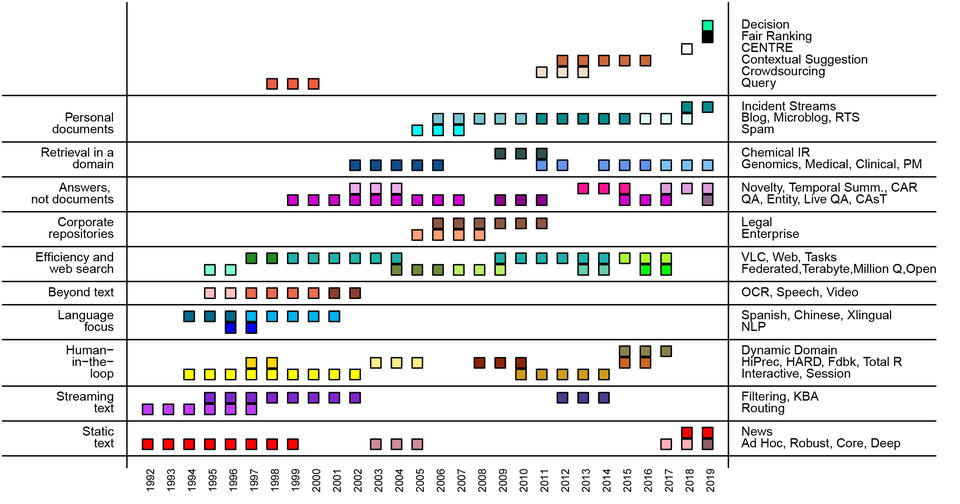

### Evaluating and IR system
- User'need in translated into a query prior to any assesment
- Relevance is assessed relative to the user need, **not the query**

- eg.
   - Informatiion need: I want to extract all the textual informatioin from a pdf file
   - get text java pdf
   - pdf parsing java
   - whether the returned documents can help the user to find a solution, not whether they contain these words.

## Standard Evaluation metric family
- Precision (Ranking)
- Recall (Ranking)
- DCG

### Precision and Recall

#### Precision - Ratio between the correct prediction and total case of predicting true.

#### Recall - Ratio between the correct prediction and total correct case.

### Some techniqcal term

#### True Positives (TP) 

    number of predicted positive in the acutal positive group
    
#### True Negatives (TN)

    number of predicted negative in the actual negative group
    
#### False Postive (FP)
    
    number of predicted positive in the actual negative group

#### False Negative (FN)

    number of predicted negative in the actual positive group

### Precision and Recall in unranked problems

#### Precision = TP / (TP + FP)

#### Recall = TR / (TP+FN)

### Example 

| Example | Predicted Positive | Predicted Negative |
| ------- | ------------------ | ------------------ |
| Actual Positive | 10         | 15                 |
| Actual Negative | 25         | 100                |


In [2]:
def precision(tp,fp) : 
    return tp / (tp+fp)
    
def recall(tp, fn) : 
    return tp / (tp + fn)

print(precision(10,25))
print(recall(10,15))

0.2857142857142857
0.4


### Standard Evaluation metrics for ranking

#### Binary Relevance
    - Precision@K
    - Recall@K
    - Mean average precision
    - Mean reciprocal rannk

#### Multiple levels of relevance
    - Normalized discounted cumulative gain (DCG)

#### Precision-recall curve
![image.png](https://i.stack.imgur.com/4Ih6X.png)
![image.png](https://i.stack.imgur.com/7bfe5.png)

### Mean Average precision

#### AP

    The average of the precision scores at the rank locations of each relevant document

#### mAP

    The mean of the average precision scores for a group of queries

#### Macro average
    
    All queries are considered equal
    
If a relevant document never gets retrived, we assume its corresponsind precision as zero.

#### Average precision

In [26]:
recall = [0.2, -0.2, 0.4,-0.4, -0.4, 0.6, -0.6, -0.6, 0.8, 1.0]
precision = [1.0, -0.5, 0.67, -0.5, -0.4, 0.5, -0.43, -0.38, 0.44, 0.5]

In [27]:
sum_precision = 0
relate_to_query = 0
for i in precision :
    if i > 0 :
        sum_precision += i
        relate_to_query += 1

average_precision = sum_precision / relate_to_query
print(average_precision)

0.622


In [28]:
recall = [0.0,0.33,-0.33,-0.33,0.67,-0.67,1.0,-1.0,-1.0,-1.0]
precision = [0.0,0.5,-0.33,-0.25,0.4,-0.33,0.43,-0.38,-0.33,-0.3]

In [29]:
sum_precision2 = 0
relate_to_query2 = 0
for i in precision :
    if i > 0 :
        sum_precision2 += i
        relate_to_query2 += 1

average_precision2 = sum_precision2 / relate_to_query2
print(average_precision2)

0.44333333333333336


#### Mean average precision

In [30]:
mean_average_precision = (average_precision + average_precision2)/2
print(mean_average_precision)

0.5326666666666666


### Mean Reciprocal Rank

#### RR 
    
    Reciprocal of the rank at which first correct response returned

#### mRR
    
    The mean of the RR scores for a group of queries

only cares about the single highest-ranked relevant item.

#### Example

In [34]:
def findRR(rr):
    total = 0
    for i in rr :
        total += 1
        if i :
            return total

In [36]:
rr1 = [False,False,False,False,True,True,True,True,True,True]
rr2 = [False,True,False,False,False,False,False,False,True,True]
rr3 = [True,False,False,False,False,False,False,False,False,False]

sum1 = 1/findRR(rr1)
sum2 = 1/findRR(rr2)
sum3 = 1/findRR(rr3)

mRR = sum1 + sum2 + sum3

print(mRR)

1.7


## Discounted Cumulative Gain

- Multiple levels of relevance
- Two assumptions:
    - Highly relevant documents are more useful than marginally relevant documents.
    - The lower the ranked position of a relevant document, the less useful it is for the user, since it is less likely to be examined.
- **Graded relevance** is the measure of usefulness from examing a document
- Usefulness is accumulated starting at the toop of the ranking and may be reduced, or discounted at lower ranks
- Typical discount function is 1/log2(rank)
- Let the relevance judgments be in a scale of [0,r] where r>2
- CG at rank n = r1 + r2 + ... + rn
- DCG at rank n = r1 + r2/log2(2) + r3/log2(3) + ... + rn/log2(n)

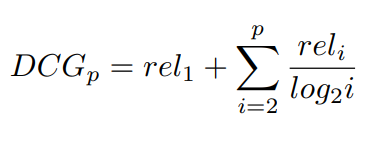